---
layout: post
title: python 梯度下降法
category: math
tags: [math, ai, python]
---

梯度下降法是机器学习算法更新模型参数的常用的方法之一。

## 相关概念

* 梯度 : 表示某一函数在一点处变化率最快的方向向量(可理解为这点的导数/偏导数)
* 样本 : 实际观测到的数据集，包括输入和输出(本文的样本数量用 m 表述,元素下标 i 表示)
* 特征 : 样本的输入(本文的特征数量用 n 表示,元素下标 j 表示)
* 假设函数 : 用来拟合样本的函数，记为 $h_\theta(X)$ ($\theta$ 为参数向量, X 为特征向量)
* 损失函数 : 用于评估模型拟合的程度，训练的目标是最小化损失函数，记为 $J(\theta)$
* 线性假设函数 :

  $$ h_\theta(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n = \sum_{j=0}^n \theta_j x_j$$ 
  
  其中 X 为特征向量, $\theta_j$为模型参数， $x_j$ 是特征向量的第 j 个元素(令$x_0$=1)。
  
* 经典的平方差损失函数如下：

  $$J(\theta) = \dfrac{1}{2m} \sum_{i=1}^m(h_\theta(X_i) - y_i)^2$$
  
  其中 m 为样本个数， $X_i$ 为样本特征集合的第 i 个元素（是一个向量）， $y_i$ 是样本输出的第i个元素, $h_\theta(X_i)$ 是假设函数。
  
  **注意：输入有多个特征时，一个样本特征是一个向量。假设函数的输入是一个特征向量而不是特征向量里面的一个元素**


## 梯度下降法

梯度下降法的目标是通过合理的方法更新假设函数 $h_\theta$ 的参数 $\theta$ 使得损失函数 $J(\theta)$ 对于所有样本最小化。

这个合理的方法的步骤如下: 

* 根据经验设计假设函数和损失函数，以及假设函数所有 $\theta$ 的初始值
* 对损失函数求所有 $\theta$ 的偏导（梯度）: $\dfrac{\partial J(\theta)}{\partial \theta_j}$
* 使用样本数据更新假设函数的 $\theta$，更新公式为: $\theta_j = \theta_j - \alpha \cdot \dfrac{\partial J}{\partial \theta_j}$

  其中 $\alpha$ 为更新步长（调整参数的灵敏度，灵敏度太高容易振荡，灵敏度过低收敛缓慢）
  


## 推导过程

  线性假设函数公式如下（根据经验或者已有数据人为定义）：
  
  $$h_\theta(X) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n = \sum_{j=0}^n \theta_j x_j$$
  
  损失函数公式如下（根据经验或者已有数据人为定义）：
  
  $$J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(X_i) - y_i)^2$$
    
  其中 $\frac{1}{2}$ 是为了计算方便（可与平方的导数相乘后抵消）。
  
  单个样本的损失函数对 $\theta$ 求偏导的流程如下:
  
  $$\begin{aligned}
   \dfrac{\partial J(\theta)}{\partial \theta_j} 
       &= \dfrac{\partial}{\partial \theta_j} \frac{1}{2} (h_\theta(X) - y)^2 \\
       &= 2 \cdot \dfrac{1}{2} (h_\theta(X) - y) \cdot \dfrac{\partial}{\partial \theta_j}(h_\theta(X) - y) \\
       &= (h_\theta(X) - y) \cdot \dfrac{\partial}{\partial \theta_j}(\theta_0 x_0 + \cdots + \theta_j x_j + \cdots + \theta_n x_n) \\
       &= (h_\theta(X) - y) \cdot x_j\\
  \end{aligned}$$

  对于所有样本的损失函数对 $\theta$ 偏导结果等于所有单个样本之和，公式如下：
  
  $$\dfrac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m (h_\theta(X_i) - y_i) \cdot X_{ij} $$
  
  其中 $X_{ij}$ 表示第 i 个样本的第 j 个特征。
  
  对于假设函数 $\theta$ 的更新公式如下($\theta$ 的初始值需要根据经验给出):
  
  $$\theta_j = \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m (h_\theta(X_i) - y_i) \cdot X_{ij} $$
      
  **使用所有样本作为输入重复执行上述过程，直到损失函数的值满足要求为止。**





## 例子

  这里用一个房屋价格评估的例子来使用梯度下降法。
  我们知道房屋的价格跟很多因素相关（例如面积、房间书、地段等），每个因素都称之为特征(feature)。
  这里假设房屋的面积是唯一特征（为简化模型而忽略其他的），已知的数据如下:
  
  房屋面积: 45, 73, 89, 120, 140, 163 （平方米）

  房屋价格: 80, 150, 198, 230, 280, 360 (万元）
  
  根据这些数据可以使用下面的 python 代码做出面积和价格的三点图。
  

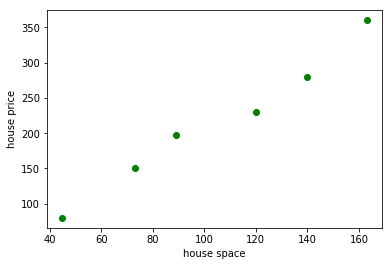

In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

spaces = [45, 73, 89, 120, 140, 163]
prices = [80, 150, 198, 230, 280, 360]
spaces, prices = np.array(spaces), np.array(prices)
plt.scatter(spaces, prices, c='g')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()

## 显示房屋面积和房屋价格的散点图


  根据梯度下降法的步骤我们需要先给定假设函数 $h_\theta$ 和损失函数 $J(\theta)$，以及初始 $\theta$ 值。
  
  这里房屋面积和价格的假设函数为： $h_\theta(x) = \theta_0 + \theta_1 x$ （一个特征）
  
  损失函数使用平均方差函数: $J(\theta) = \dfrac{1}{2*6} \sum_{i=1}^6(h_\theta(X_i) - y_i)^2$ （6个样本）
  
  假设更新步长为 0.00005， 则更新公式为 $\theta_j = \theta_j -  0.00005 \cdot \dfrac{1}{6} \sum_{i=1}^6 (h_\theta(X_i) - y_i) \cdot X_{ij} $
  
  其中 $\theta_j$ 包含 $\theta_0$ 和 $\theta_1$ ， $X_{i0}$ = 1。
  
  **注意: 如果步长选择不对，则 theta 参数更新结果会不对**
  
  使用下面 python 代码计算 $\theta$ 并画出 $h_\theta$ 函数 ：
  


 h(x) = 0.016206 + 2.078464 * x


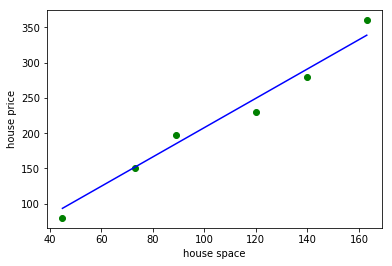

In [112]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## theta 初始值
theta0 = 0
theta1 = 0

## 如果步长选择不对，则 theta 参数更新结果会不对
step = 0.00005

x_i0 = np.ones((len(spaces)))

# 假设函数
def h(x) :
  return theta0 + theta1 * x

# 损失函数
def calc_error() :
  return np.sum(np.power((h(spaces) - prices),2)) / 6

# 损失函数偏导数( theta 0)
def calc_delta0() :
  return step * np.sum((h(spaces) - prices) * x_i0) / 6

# 损失函数偏导数( theta 1)
def calc_delta1() :
  return step * np.sum((h(spaces) - prices) * spaces) / 6

# 循环更新 theta 值并计算误差，停止条件为
#  1. 误差小于某个值
#  2. 循环次数控制
k = 0
while True :
  delta0 = calc_delta0()
  delta1 = calc_delta1()
  theta0 = theta0 - delta0
  theta1 = theta1 - delta1
  error = calc_error()
  # print("delta [%f, %f], theta [%f, %f], error %f" % (delta0, delta1, theta0, theta1, error))
  k = k + 1
  if (k > 10 or error < 200) : 
    break


print(" h(x) = %f + %f * x" % (theta0, theta1))
    
# 使用假设函数计算出来的价格，用于画拟合曲线
y_out = h(spaces)

plt.scatter(spaces, prices, c='g')
plt.plot(spaces, y_out, c='b')
plt.xlabel('house space')
plt.ylabel('house price')
plt.show()

# 绿色的点是房屋面积和价格数据
# 蓝色的线是我们使用梯度下降法拟合出来的曲线

  通过运行上述代码，我们可以看出，梯度下降法的结果跟 $\theta$ 的初始值以及步长相关。
  我们需要根据系统的特性凭经验给出 $\theta$ 和步长。
  
  对于多特征系统来说，其实就是 $h_\theta$ 的改变而已，如果使用矩阵形式表示的话会更加方便。
  
  假设函数向量形式（其中X是二维矩阵 m 行 n 列）：
  
  $$ h_\theta(X) = X \theta $$
  
  损失函数向量形式（其中 Y 是 m 行 1 列的样本输出）：
  
  $$ J(\theta) = \dfrac{1}{2}(X \theta - Y)^T (X \theta - Y)$$
  
  $\theta$ 向量更新形式，令
  
  $$\triangledown \theta = \left[
  \begin{matrix}
   \dfrac{\partial J}{\partial \theta_0} \\
   \cdot \\
   \cdot \\
   \cdot \\
   \dfrac{\partial J}{\partial \theta_n}
  \end{matrix}
  \right]
  $$
  
  $$ \theta = \theta - \alpha \cdot \triangledown \theta = \theta - \alpha (\theta \cdot X \cdot X^T)$$
  
  我们改进一下上述 python 代码，使用矩阵处理以适应多特征系统并得出一样的结果。
  
  **注意: 用矩阵公式表示的时候没有除以样本数,实际写代码要除以样本数**

In [111]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 输入数据格式:
##  1. 一个特征的是一维数组，表示样本
##  2. 多个特征的是二维数组，列表示特征数，行表示样本数
spaces = np.array([45, 73, 89, 120, 140, 163])
prices = np.array([80, 150, 198, 230, 280, 360])

# 步长
step = 0.00005

## 先计算输入的特征个数, 然后根据特征数生成 theta，并在样本数据前面插入一列全1数据
def genrate_model(inputs) :
  _features = 2
  _samples = inputs.shape[0]
  if len(inputs.shape) == 2 :
    _features = inputs.shape[2] + 1
  _x0 = np.ones(_samples)
  _theta = np.zeros(_features)
  return np.c_[_x0, inputs], _theta, _samples

## 假设函数：输入数据矩阵与theta向量向乘, 返回多项式结果的一维矩阵
def h_a(x) :
    return (theta * x).sum(axis=1)

## 损失函数
def e_a(x,y) :
  return np.sum(np.power((h_a(x) - y),2)) / m

## delta函数：计算偏导乘以补偿
def delta_a(x, y) :
  return step * ((h_a(x) - y) * np.transpose(x)).sum(axis=1) / m


## 系统的特征数 + 1
x_data, theta, m = genrate_model(spaces)
y_data = prices


## 重新计算 delta 并更新 theta
k = 0
while True:
    _d = delta_a(x_data, y_data)
    theta = theta - _d
    error = e_a(x_data, y_data)
    # print("delta", _d, "theta ", theta , ", error ", error, "k ", k)
    k = k + 1
    if (k > 10 or error < 200) :
      break;

# 打印 theta 结果，可以看出与上面 python 代码计算的结果是一致的。
print("theta array : " , theta)

theta array :  [ 0.01620597  2.07846445]


## 注意点

* 对于凸函数来说 $\theta$ 的初始值多少关系不大，对于非凸函数的初始值选择不当会陷入局部最优解
* 梯度下降的步长取决于样本数据，根据实际运行效果进行调整
* 误差最小值也是跟数据相关的，需要根据实际情况给定结束条件
* 对于多个特征值的系统，需要使用 z-score 方法对数据进行归一化,公式如下:

  $$ N(x) = \dfrac{x - x.mean()}{x.std()}$$


## 分类

根据更新 $\theta$ 时使用样本的数量对梯度下降法进行分类：

* 批量梯度下降法（BGD）：使用所有样本进行计算，慢但准确度好
* 随机梯度下降法（SGD)：每次使用1个样本进行计算,快但准确度欠缺
* 小批量梯度下降法：每次使用a个样本进行计算，是BGD和SGD的折中方案



转载请注明出处: [http://blog.lisp4fun.com/2017/11/02/gradient-desent](http://blog.lisp4fun.com/2017/11/02/gradient-desent)
